In [233]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
#import data from csv file
df_sell_price_original= pd.read_csv("data/m5-forecasting-accuracy/sell_prices.csv")
df_calender= pd.read_csv("data/m5-forecasting-accuracy/calendar.csv")
df_evaluation = pd.read_csv("data/m5-forecasting-accuracy/sales_train_evaluation.csv")

### sales_train_evaluation.csv evaluation

In [234]:
df_evaluation.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


In [235]:
df_evaluation.shape

(30490, 1947)

In [236]:
df_evaluation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1947 entries, id to d_1941
dtypes: int64(1941), object(6)
memory usage: 452.9+ MB


This tells us that there should be 30490 product data linked with store id

In [237]:
df_evaluation.isnull().any().sum()

0

There is no null value in the table "sales_train_evaluation"

len(df_evaluation.columns[6:])

The count of date data is 1941

In [238]:
date_col = df_evaluation.columns[6:]
s_temp = pd.Series(date_col)
s_temp = s_temp.duplicated()
s_temp = s_temp.loc[s_temp == 'False'].count()
s_temp

0

We can see that there is no duplicated date columns meaning there are 1941 date data

In [239]:
df_eva_product = df_evaluation.drop_duplicates(['store_id','item_id'])
table_prod_eva = df_evaluation.groupby('store_id')['item_id'].count().to_frame('Product_number')
table_prod_eva

,Product_number
store_id,
CA_1,3049
CA_2,3049
CA_3,3049
CA_4,3049
TX_1,3049
TX_2,3049
TX_3,3049
WI_1,3049
WI_2,3049


In [240]:
df_eva_product = df_evaluation.drop_duplicates(['store_id','item_id'])
table_prod_cat_eva = df_evaluation.groupby(['store_id','cat_id'])['item_id'].count().to_frame('Product_Quantitiy')
table_prod_cat_eva_reset_index = table_prod_cat_eva.reset_index()

In [241]:
table_prod_cat_eva_reset_index.head()

,store_id,cat_id,Product_Quantitiy
0,CA_1,FOODS,1437
1,CA_1,HOBBIES,565
2,CA_1,HOUSEHOLD,1047
3,CA_2,FOODS,1437
4,CA_2,HOBBIES,565


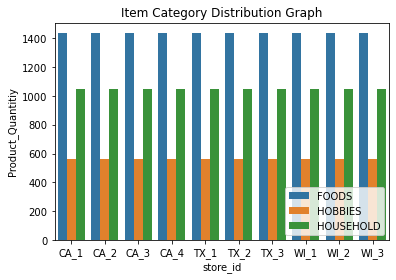

In [242]:
import seaborn as sns
sns.barplot(data = table_prod_cat_eva_reset_index, x = "store_id", y = 'Product_Quantitiy', hue = 'cat_id')
plt.title("Item Category Distribution Graph")
plt.legend(loc = 'lower right')
plt.show()

In [243]:
if df_eva_product.shape == df_evaluation.shape:
    print("There is no duplicate product in the table")

There is no duplicate product in the table


Lets see how many zeros are in this table

### sell_prices.csv evaluation

In [244]:
df_sell_price_original.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [245]:
df_sell_price_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   store_id    object 
 1   item_id     object 
 2   wm_yr_wk    int64  
 3   sell_price  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 208.8+ MB


In [246]:
df_sell_price_original.isnull().sum()

store_id      0
item_id       0
wm_yr_wk      0
sell_price    0
dtype: int64

We can see tha the week id has been linked to this table for the date. However, evaluation table was linked with date id.

In [247]:
df_sell_price_original.isnull().any().sum()

0

We can see that there is no null value in this table.

In [248]:
df_evaluation['dept_id'].unique()

array(['HOBBIES_1', 'HOBBIES_2', 'HOUSEHOLD_1', 'HOUSEHOLD_2', 'FOODS_1',
       'FOODS_2', 'FOODS_3'], dtype=object)

In [250]:
df_sell_price =df_sell_price_original.copy()
df_sell_price['category'] = df_sell_price['item_id'].str.split("_")
df_sell_price['category_ID'] =  df_sell_price['item_id'].str.split("_").str[0] + "_" + \
df_sell_price['item_id'].str.split("_").str[1]
df_sell_price['item_number'] =  df_sell_price['item_id'].str.split("_").str[2]
df_sell_price['store_item_id'] =  df_sell_price['store_id'] + "_" + df_sell_price['item_id']
df_sell_price['store_location'] = df_sell_price['store_id'].str.split("_").str[0]
df_sell_price['store_number'] = df_sell_price['store_id'].str.split("_").str[1]
df_sell_price['id'] = df_sell_price['item_id'] + '_' + df_sell_price['store_id'] + '_evaluation'

In [251]:
df_product = df_sell_price.drop_duplicates(['store_id','item_id'])
table_prod_sell = df_product.groupby('store_id')['item_id'].count().to_frame('Product_number')
table_prod_sell

,Product_number
store_id,
CA_1,3049
CA_2,3049
CA_3,3049
CA_4,3049
TX_1,3049
TX_2,3049
TX_3,3049
WI_1,3049
WI_2,3049


In [252]:
if table_prod_sell.compare(table_prod_eva).empty:
    print("same store id and products are in the data for table for evaluation and ")

same store id and products are in the data for table for evaluation and 


In [253]:
if df_eva_product.shape[0] == df_product.shape[0]:
    print("There is no duplicate product in the table between evaluation table and sells price table")

There is no duplicate product in the table between evaluation table and sells price table


### calendar.csv evaluation

In [254]:
df_calender.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [255]:
df_calender.tail()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0
1968,2016-06-19,11621,Sunday,2,6,2016,d_1969,NBAFinalsEnd,Sporting,Father's day,Cultural,0,0,0


In [256]:
df_calender.shape

(1969, 14)

In [257]:
df_calender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   event_name_2  5 non-null      object
 10  event_type_2  5 non-null      object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 215.5+ KB


In [258]:
df_calender.isnull().sum()

date               0
wm_yr_wk           0
weekday            0
wday               0
month              0
year               0
d                  0
event_name_1    1807
event_type_1    1807
event_name_2    1964
event_type_2    1964
snap_CA            0
snap_TX            0
snap_WI            0
dtype: int64

In [259]:
df_calender['event_name_1'] = df_calender['event_name_1'].fillna("No_Event")
df_calender['event_type_1'] = df_calender['event_type_1'].fillna("No_Event")
df_calender['event_name_2'] = df_calender['event_name_2'].fillna("No_Event")
df_calender['event_type_2'] = df_calender['event_type_2'].fillna("No_Event")

In [260]:
df_calender.loc[(df_calender['d'] == 'd_1941')]

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
1940,2016-05-22,11617,Sunday,2,5,2016,d_1941,No_Event,No_Event,No_Event,No_Event,0,0,0


We would need to create a calender finish with 2016-05-22 to create same table date value as evaluation table

In [261]:
##### import seaborn as sns
from matplotlib import pyplot as plt
df_calender['date'] = pd.to_datetime(df_calender['date'], format = '%Y-%m-%d')

df_calender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1969 non-null   datetime64[ns]
 1   wm_yr_wk      1969 non-null   int64         
 2   weekday       1969 non-null   object        
 3   wday          1969 non-null   int64         
 4   month         1969 non-null   int64         
 5   year          1969 non-null   int64         
 6   d             1969 non-null   object        
 7   event_name_1  1969 non-null   object        
 8   event_type_1  1969 non-null   object        
 9   event_name_2  1969 non-null   object        
 10  event_type_2  1969 non-null   object        
 11  snap_CA       1969 non-null   int64         
 12  snap_TX       1969 non-null   int64         
 13  snap_WI       1969 non-null   int64         
dtypes: datetime64[ns](1), int64(7), object(6)
memory usage: 215.5+ KB


In [262]:
N_day_in_wm_yr_wk = df_calender.groupby('wm_yr_wk')['date'].count().to_frame('Number of days in wm_yr_wk').reset_index()
N_day_in_wm_yr_wk.loc[N_day_in_wm_yr_wk['Number of days in wm_yr_wk'] != 7]

,wm_yr_wk,Number of days in wm_yr_wk
281,11621,2


we can see here that all the week id contain 7 days except last id

In [263]:
df_calender.loc[(df_calender['date'] >= '2011-12-31') & (df_calender['date'] <= '2012-01-30')]

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
336,2011-12-31,11149,Saturday,1,12,2011,d_337,No_Event,No_Event,No_Event,No_Event,0,0,0
337,2012-01-01,11149,Sunday,2,1,2012,d_338,NewYear,National,No_Event,No_Event,1,1,0
338,2012-01-02,11149,Monday,3,1,2012,d_339,No_Event,No_Event,No_Event,No_Event,1,0,1
339,2012-01-03,11149,Tuesday,4,1,2012,d_340,No_Event,No_Event,No_Event,No_Event,1,1,1
340,2012-01-04,11149,Wednesday,5,1,2012,d_341,No_Event,No_Event,No_Event,No_Event,1,0,0
341,2012-01-05,11149,Thursday,6,1,2012,d_342,No_Event,No_Event,No_Event,No_Event,1,1,1
342,2012-01-06,11149,Friday,7,1,2012,d_343,No_Event,No_Event,No_Event,No_Event,1,1,1
343,2012-01-07,11150,Saturday,1,1,2012,d_344,OrthodoxChristmas,Religious,No_Event,No_Event,1,1,0
344,2012-01-08,11150,Sunday,2,1,2012,d_345,No_Event,No_Event,No_Event,No_Event,1,0,1
345,2012-01-09,11150,Monday,3,1,2012,d_346,No_Event,No_Event,No_Event,No_Event,1,1,1


We can see that the 'wm_yr_wk' does not increment by 1 every time. 11201 which explains the trend of . <br>
It seems to be the combination of '1' and last 2 digits of year and week number

In [264]:
import datetime

df_calender['wm_yr_wk_shift'] = df_calender['wm_yr_wk'].shift(1)
df_calender.loc[(df_calender['wm_yr_wk'] - df_calender['wm_yr_wk_shift'] > 1) | (df_calender['wm_yr_wk'] - df_calender['wm_yr_wk_shift'] < 0)]

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,wm_yr_wk_shift
364,2012-01-28,11201,Saturday,1,1,2012,d_365,No_Event,No_Event,No_Event,No_Event,0,0,0,11152.0
728,2013-01-26,11301,Saturday,1,1,2013,d_729,No_Event,No_Event,No_Event,No_Event,0,0,0,11252.0
1099,2014-02-01,11401,Saturday,1,2,2014,d_1100,No_Event,No_Event,No_Event,No_Event,1,1,0,11353.0
1463,2015-01-31,11501,Saturday,1,1,2015,d_1464,No_Event,No_Event,No_Event,No_Event,0,0,0,11452.0
1827,2016-01-30,11601,Saturday,1,1,2016,d_1828,No_Event,No_Event,No_Event,No_Event,0,0,0,11552.0


This shows that every beginning week of Febuary 'wr_yr_wk' reset the week count and change the year

In [265]:
import datetime
weekday = ("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")
actual_time = pd.DataFrame()
actual_time['date'] = pd.date_range(start = '2011-01-29', end = '2016-06-19', freq = '1D')
actual_time['weekday'] = actual_time['date'].map(lambda x: weekday[x.weekday()])
actual_time.loc[actual_time['weekday'] != df_calender['weekday']]

,date,weekday


This shows weekday data is correct

In [266]:
actual_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     1969 non-null   datetime64[ns]
 1   weekday  1969 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 30.9+ KB


In [267]:

df_calender['day'] = df_calender['d'].str.split("_").str[1]
df_calender['d_shift'] = df_calender['day'].shift(1)
df_calender.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,wm_yr_wk_shift,day,d_shift
0,2011-01-29,11101,Saturday,1,1,2011,d_1,No_Event,No_Event,No_Event,No_Event,0,0,0,NaN,1,NaN
1,2011-01-30,11101,Sunday,2,1,2011,d_2,No_Event,No_Event,No_Event,No_Event,0,0,0,11101.0,2,1
2,2011-01-31,11101,Monday,3,1,2011,d_3,No_Event,No_Event,No_Event,No_Event,0,0,0,11101.0,3,2
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,No_Event,No_Event,No_Event,No_Event,1,1,0,11101.0,4,3
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,No_Event,No_Event,No_Event,No_Event,1,0,1,11101.0,5,4


In [268]:
df_calender.loc[((df_calender['day']).astype(float) - df_calender['d_shift'].astype(float) > 1) | (df_calender['day'].astype(float) - df_calender['d_shift'].astype(float) < 0)]

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,wm_yr_wk_shift,day,d_shift


This shows d information is correctly incremented.

In [269]:
df_calender = df_calender.drop(labels=['d_shift','wm_yr_wk_shift'], axis=1)

In [270]:
df_calender

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,day
0,2011-01-29,11101,Saturday,1,1,2011,d_1,No_Event,No_Event,No_Event,No_Event,0,0,0,1
1,2011-01-30,11101,Sunday,2,1,2011,d_2,No_Event,No_Event,No_Event,No_Event,0,0,0,2
2,2011-01-31,11101,Monday,3,1,2011,d_3,No_Event,No_Event,No_Event,No_Event,0,0,0,3
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,No_Event,No_Event,No_Event,No_Event,1,1,0,4
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,No_Event,No_Event,No_Event,No_Event,1,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,No_Event,No_Event,No_Event,No_Event,0,1,1,1965
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,No_Event,No_Event,No_Event,No_Event,0,0,0,1966
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,No_Event,No_Event,No_Event,No_Event,0,0,0,1967
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,No_Event,No_Event,No_Event,No_Event,0,0,0,1968


In [271]:
df_week_check_CA = df_calender.groupby(['weekday','snap_CA'])['weekday'].count().to_frame('Count_of_Date').reset_index()
df_week_check_WI = df_calender.groupby(['weekday','snap_WI'])['weekday'].count().to_frame('Count_of_Date').reset_index()
df_week_check_TX = df_calender.groupby(['weekday','snap_TX'])['weekday'].count().to_frame('Count_of_Date').reset_index()
df_week_check_All = df_calender.groupby(['weekday'])['weekday'].count().to_frame('Count_of_Date').reset_index()

In [272]:
df_week_check_All['CA_SNAP_YES'] =  df_week_check_CA['Count_of_Date'].loc[df_week_check_CA['snap_CA'] == 1].reset_index().drop('index', axis = 1)
df_week_check_All['CA_SNAP_NO'] =  df_week_check_CA['Count_of_Date'].loc[df_week_check_CA['snap_CA'] == 0].reset_index().drop('index', axis = 1)
df_week_check_All['WI_SNAP_YES'] =  df_week_check_WI['Count_of_Date'].loc[df_week_check_WI['snap_WI'] == 1].reset_index().drop('index', axis = 1)
df_week_check_All['WI_SNAP_NO'] =  df_week_check_WI['Count_of_Date'].loc[df_week_check_WI['snap_WI'] == 0].reset_index().drop('index', axis = 1)
df_week_check_All['TX_SNAP_YES'] =  df_week_check_TX['Count_of_Date'].loc[df_week_check_TX['snap_TX'] == 1].reset_index().drop('index', axis = 1)
df_week_check_All['TX_SNAP_NO'] =  df_week_check_TX['Count_of_Date'].loc[df_week_check_TX['snap_TX'] == 0].reset_index().drop('index', axis = 1)
df_week_check_All = df_week_check_All.drop('Count_of_Date', axis = 1)

In [273]:
df_week_check_All

,weekday,CA_SNAP_YES,CA_SNAP_NO,WI_SNAP_YES,WI_SNAP_NO,TX_SNAP_YES,TX_SNAP_NO
0,Friday,92,189,91,190,94,187
1,Monday,92,189,92,189,90,191
2,Saturday,91,191,94,188,92,190
3,Sunday,94,188,93,189,96,186
4,Thursday,93,188,93,188,92,189
5,Tuesday,95,186,94,187,94,187
6,Wednesday,93,188,93,188,92,189


In [274]:
df_week_check_All_test = pd.melt(df_week_check_All, id_vars= 'weekday', var_name="State and SNAP")

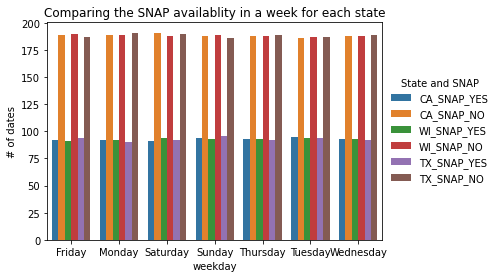

In [275]:
from matplotlib import pyplot as plt
ax = sns.barplot(data = df_week_check_All_test, x ='weekday', y = 'value', hue ="State and SNAP" )
sns.move_legend(ax, bbox_to_anchor=(1, 0.5), loc='center left', frameon=False)
plt.title("Comparing the SNAP availablity in a week for each state")
plt.ylabel("# of dates")
plt.show()

In [276]:
df_calender['event_type_1'].value_counts()

df_calender_event1_type_count = df_calender.groupby('event_type_1')['date'].count().to_frame('Number of Event')
df_calender_event1_type_count

,Number of Event
event_type_1,
Cultural,37
National,52
No_Event,1807
Religious,55
Sporting,18


In [277]:
df_calender_event2_type_count = df_calender.groupby('event_type_2')['date'].count().to_frame('Number of Event')
df_calender_event2_type_count

,Number of Event
event_type_2,
Cultural,4
No_Event,1964
Religious,1


In [278]:
df_calender_event1_name_count = df_calender.groupby('event_name_1')['date'].count().to_frame('Number of Event Occured').sort_values('Number of Event Occured')
df_calender_event1_name_count

,Number of Event Occured
event_name_1,
Father's day,4
Chanukah End,5
Thanksgiving,5
OrthodoxEaster,5
OrthodoxChristmas,5
NewYear,5
MartinLutherKingDay,5
LaborDay,5
IndependenceDay,5


In [279]:
df_calender_event2_name_count = df_calender.groupby('event_name_2')['date'].count().to_frame('Number of Event Occured').sort_values('Number of Event Occured')
df_calender_event2_name_count

,Number of Event Occured
event_name_2,
Cinco De Mayo,1
Easter,1
OrthodoxEaster,1
Father's day,2
No_Event,1964


### Modify the table

In [280]:
df_evaluation.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


In [281]:
df_sell_price_original.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [282]:
# data_melt = df_evaluation.drop(['item_id','dept_id','cat_id','store_id','state_id'], axis = 1).melt(id_vars='id', var_name='d', value_name='Daily_total_number_sales')

In [283]:
df_calender

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,day
0,2011-01-29,11101,Saturday,1,1,2011,d_1,No_Event,No_Event,No_Event,No_Event,0,0,0,1
1,2011-01-30,11101,Sunday,2,1,2011,d_2,No_Event,No_Event,No_Event,No_Event,0,0,0,2
2,2011-01-31,11101,Monday,3,1,2011,d_3,No_Event,No_Event,No_Event,No_Event,0,0,0,3
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,No_Event,No_Event,No_Event,No_Event,1,1,0,4
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,No_Event,No_Event,No_Event,No_Event,1,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,No_Event,No_Event,No_Event,No_Event,0,1,1,1965
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,No_Event,No_Event,No_Event,No_Event,0,0,0,1966
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,No_Event,No_Event,No_Event,No_Event,0,0,0,1967
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,No_Event,No_Event,No_Event,No_Event,0,0,0,1968


In [284]:
# data_melt = data_melt.merge(df_calender, on = 'd',how = 'left')
# data_melt['date'] = pd.to_datetime(data_melt['date'])

In [285]:
# data_melt = data_melt.merge(df_evaluation[['id','item_id','dept_id','cat_id','store_id','state_id']], on = 'id')
                            

In [286]:
# data_melt.head()


In [287]:
df_evaluation

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,1,0,3,0,1,1,0,0,1,1
30486,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
30487,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,0,0,1,2,0,1,0,1,0,2
30488,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,1,1,1,4,6,0,1,1,1,0


In [288]:
import numpy as np
from sklearn.metrics import mean_squared_error

def rmse(y_true,y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse

In [289]:
df_calender

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,day
0,2011-01-29,11101,Saturday,1,1,2011,d_1,No_Event,No_Event,No_Event,No_Event,0,0,0,1
1,2011-01-30,11101,Sunday,2,1,2011,d_2,No_Event,No_Event,No_Event,No_Event,0,0,0,2
2,2011-01-31,11101,Monday,3,1,2011,d_3,No_Event,No_Event,No_Event,No_Event,0,0,0,3
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,No_Event,No_Event,No_Event,No_Event,1,1,0,4
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,No_Event,No_Event,No_Event,No_Event,1,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,No_Event,No_Event,No_Event,No_Event,0,1,1,1965
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,No_Event,No_Event,No_Event,No_Event,0,0,0,1966
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,No_Event,No_Event,No_Event,No_Event,0,0,0,1967
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,No_Event,No_Event,No_Event,No_Event,0,0,0,1968


In [290]:
# df_calender=df_calender.drop(['wm_yr_wk_shift','d_num','d_shift'],axis=1)

In [291]:
df_calender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1969 non-null   datetime64[ns]
 1   wm_yr_wk      1969 non-null   int64         
 2   weekday       1969 non-null   object        
 3   wday          1969 non-null   int64         
 4   month         1969 non-null   int64         
 5   year          1969 non-null   int64         
 6   d             1969 non-null   object        
 7   event_name_1  1969 non-null   object        
 8   event_type_1  1969 non-null   object        
 9   event_name_2  1969 non-null   object        
 10  event_type_2  1969 non-null   object        
 11  snap_CA       1969 non-null   int64         
 12  snap_TX       1969 non-null   int64         
 13  snap_WI       1969 non-null   int64         
 14  day           1969 non-null   object        
dtypes: datetime64[ns](1), int64(7), object

In [323]:
from tqdm import tqdm
import numpy as np
from sklearn.preprocessing import LabelEncoder

#Replace null values to 'no_event' in event columns
cat=['event_name_1','event_type_1','event_name_2','event_type_2']
for i in cat:
    df_calender.loc[:,i].fillna('no_event',inplace=True)

#Adding feature 'is_weekend' which will tell the weekend or not

df_calender['is_weekend']=0
df_calender['is_weekend'].loc[df_calender['wday'] == 1] =1
df_calender['is_weekend'].loc[df_calender['wday'] == 2] =1
#Adding feature 'month_day' which  will tell day of the month
df_calender['month_day']=0
df_calender['month_day']=df_calender.loc[:, 'date'].dt.month

#Adding feature 'month_week_number' which  will tell  week of the year
df_calender['week_number']= df_calender.loc[:,'date'].dt.isocalendar().week

#Adding feature 'events_per_day' which tells us number of events on particular day
df_calender['events_per_day'] = 0
df_calender['events_per_day'].loc[(df_calender['event_type_1'] != 'No_Event')] =1
df_calender['events_per_day'].loc[(df_calender['event_type_2'] != 'No_Event')] =2

# df_calender.loc[:, 'day'] = df_calender.loc[:,'d'].str.split("_",1).map(lambda x: x[1])
# df_calender['day'] = 0


df_calender.loc[:,'day'] = df_calender.loc[:,'d'].str.split("_",1).str[1].astype('string').astype('int32')
df_calender['day'].astype('string').astype('int8')
df_calender.loc[:, ('wday', 'month','snap_CA', 'snap_TX', 'snap_WI', 'is_weekend', 'month_day', 'week_number','events_per_day')] = df_calender.loc[:, ('wday', 'month','snap_CA', 'snap_TX', 'snap_WI', 'is_weekend', 'month_day', 'week_number','events_per_day')].astype('int32')

df_calender.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            1969 non-null   datetime64[ns]
 1   wm_yr_wk        1969 non-null   int64         
 2   weekday         1969 non-null   object        
 3   wday            1969 non-null   int32         
 4   month           1969 non-null   int32         
 5   year            1969 non-null   int64         
 6   d               1969 non-null   object        
 7   event_name_1    1969 non-null   object        
 8   event_type_1    1969 non-null   object        
 9   event_name_2    1969 non-null   object        
 10  event_type_2    1969 non-null   object        
 11  snap_CA         1969 non-null   int32         
 12  snap_TX         1969 non-null   int32         
 13  snap_WI         1969 non-null   int32         
 14  day             1969 non-null   int32         
 15  is_w

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [324]:
df_calender.loc[(df_calender['event_type_2'] !='No_Event') & (df_calender['event_type_1'] !='No_Event')]


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,day,is_weekend,month_day,week_number,events_per_day
85,2011-04-24,11113,Sunday,2,4,2011,d_86,OrthodoxEaster,Religious,Easter,Cultural,0,0,0,86,1,4,16,2
827,2013-05-05,11315,Sunday,2,5,2013,d_828,OrthodoxEaster,Religious,Cinco De Mayo,Cultural,1,1,1,828,1,5,18,2
1177,2014-04-20,11412,Sunday,2,4,2014,d_1178,Easter,Cultural,OrthodoxEaster,Religious,0,0,0,1178,1,4,16,2
1233,2014-06-15,11420,Sunday,2,6,2014,d_1234,NBAFinalsEnd,Sporting,Father's day,Cultural,0,1,1,1234,1,6,24,2
1968,2016-06-19,11621,Sunday,2,6,2016,d_1969,NBAFinalsEnd,Sporting,Father's day,Cultural,0,0,0,1969,1,6,24,2


In [325]:

# df_calender.loc[:, 'day'] = df_calender.loc[:,'d'].str.split("_",1).map(lambda x: x[1])

In [326]:
df_calender.tail()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,day,is_weekend,month_day,week_number,events_per_day
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,No_Event,No_Event,No_Event,No_Event,0,1,1,1965,0,6,24,0
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,No_Event,No_Event,No_Event,No_Event,0,0,0,1966,0,6,24,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,No_Event,No_Event,No_Event,No_Event,0,0,0,1967,0,6,24,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,No_Event,No_Event,No_Event,No_Event,0,0,0,1968,1,6,24,0
1968,2016-06-19,11621,Sunday,2,6,2016,d_1969,NBAFinalsEnd,Sporting,Father's day,Cultural,0,0,0,1969,1,6,24,2


In [327]:
df_calender.to_csv('new_df_calender.csv')

In [328]:
df_sell_price_original.loc[df_sell_price_original['sell_price'] ==0]

,store_id,item_id,wm_yr_wk,sell_price


In [337]:
final_df=pd.melt(df_evaluation,id_vars=['id','item_id','dept_id','cat_id','store_id','state_id'],var_name='d',value_name='sell_quantity')
final_df=pd.merge(final_df,df_calender,on='d',how='left')
final_df=pd.merge(final_df,df_sell_price_original, on=['item_id','store_id','wm_yr_wk'], how='left')
# final_df['day'] = final_df['d'].str.split("_").str[1]
# final_df['day'] = final_df['day'].astype('int16')

In [338]:
# final_df = final_df.drop('d', axis = 1)

In [339]:
# sales=pd.merge(sales,df_calender,on='d',how='left')
# sales=pd.merge(sales,df_sell_price_original,on=['item_id','store_id','wm_yr_wk'],how='left')
# sales['day'] = sales['d'].str.split("_").str[1]
# sales['day'] = sales['day'].astype('int16')

In [340]:
#Melting
# sales=pd.melt(df_evaluation, id_vars=['id','item_id','dept_id','cat_id','store_id','state_id'], var_name='d', value_name='Sold_Quantity')
# sales=pd.merge(sales,df_calender,on='d',how='left')
# sales=pd.merge(sales,df_sell_price_original,on=['item_id','store_id','wm_yr_wk'],how='left')
# sales['day'] = sales['d'].str.split("_").str[1]
# sales['day'] = sales['day'].astype('int16')
# # #Since we got many rows with 'NaN' values in Sell Price.Thus replacing 'NaN" in 'sell_price' feature with the mean value
# sales['sell_price']=sales['sell_price'].fillna(sales.groupby('id')['sell_price'].transform('mean'))

In [341]:
final_df.isna().sum()

id                       0
item_id                  0
dept_id                  0
cat_id                   0
store_id                 0
state_id                 0
d                        0
sell_quantity            0
date                     0
wm_yr_wk                 0
weekday                  0
wday                     0
month                    0
year                     0
event_name_1             0
event_type_1             0
event_name_2             0
event_type_2             0
snap_CA                  0
snap_TX                  0
snap_WI                  0
day                      0
is_weekend               0
month_day                0
week_number              0
events_per_day           0
sell_price        12299413
dtype: int64

In [342]:
final_df.shape

(59181090, 27)

In [350]:
final_df=final_df.dropna()

In [351]:
final_df.shape

(46881677, 27)

In [352]:
final_df.isna().sum()

id                0
item_id           0
dept_id           0
cat_id            0
store_id          0
state_id          0
d                 0
sell_quantity     0
date              0
wm_yr_wk          0
weekday           0
wday              0
month             0
year              0
event_name_1      0
event_type_1      0
event_name_2      0
event_type_2      0
snap_CA           0
snap_TX           0
snap_WI           0
day               0
is_weekend        0
month_day         0
week_number       0
events_per_day    0
sell_price        0
dtype: int64

In [353]:
final_df.loc[:, 'daily_sell'] = final_df.loc[:,'sell_price'] * final_df.loc[:,'sell_quantity']

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [354]:
final_df.tail()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sell_quantity,date,wm_yr_wk,...,snap_CA,snap_TX,snap_WI,day,is_weekend,month_day,week_number,events_per_day,sell_price,daily_sell
59181085,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,d_1941,1,2016-05-22,11617,...,0,0,0,1941,1,5,20,0,2.98,2.98
59181086,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,d_1941,0,2016-05-22,11617,...,0,0,0,1941,1,5,20,0,2.48,0.00
59181087,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,d_1941,2,2016-05-22,11617,...,0,0,0,1941,1,5,20,0,3.98,7.96
59181088,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,d_1941,0,2016-05-22,11617,...,0,0,0,1941,1,5,20,0,1.28,0.00
59181089,FOODS_3_827_WI_3_evaluation,FOODS_3_827,FOODS_3,FOODS,WI_3,WI,d_1941,1,2016-05-22,11617,...,0,0,0,1941,1,5,20,0,1.00,1.00


In [355]:
def evaluating_item(product_table, product_name):

    #LCreating ags to the evaluating table
    lags = [1,2,3,7,14,21,28,35]
    added_column = []
    for i in lags:
        product_table['lag_' + str(i)]=product_table[product_name].shift(i)
        added_column.append('lag_' + str(i))

    #Rolling-Median
    window=[7,14,28,35,42]
    for i in window:
        product_table['rolling_median_'+str(i)]=product_table[product_name].transform(lambda s: s.rolling(i,center=False).median())
        added_column.append('rolling_median_'+str(i))

    #Rolling-std
    window=[7,14,28,35,42]
    for i in window:
        product_table['rolling_std_'+str(i)]=product_table[product_name].transform(lambda s: s.rolling(i,center=False).std())
        added_column.append('rolling_std_'+str(i))
        
    #Replacing 'NaN' values for lag and rolling_ mean columns data with zero
    for i in added_column:
        product_table[i]=product_table[i].fillna(0)

In [356]:
#Data splitting
train=final_df.loc[final_df['day']<1914]
test=final_df.loc[final_df['day']>=1914]

def moving_avg(data,window_size):
    values=pd.Series(data)
    windows=values.rolling(window_size)
    moving_averages=windows.mean()
  #No. of NaN values will be equal to window_size we take .Thats why I replaced 'NaN' with '0'
    moving_averages=moving_averages.fillna(0) 
    moving_averages=moving_averages.tolist()
    print("Window Size:",window_size,"  ","RMSE:",rmse(values,moving_averages))
    print("-"*50)
    return moving_averages


for i in range(7,21):
    y_hat=moving_avg(test['sell_quantity'].tolist(),i)


Window Size: 7    RMSE: 3.280235123506178
--------------------------------------------------
Window Size: 8    RMSE: 3.301026136008003
--------------------------------------------------
Window Size: 9    RMSE: 3.328544705207132
--------------------------------------------------
Window Size: 10    RMSE: 3.3485950363715724
--------------------------------------------------
Window Size: 11    RMSE: 3.3628552655047703
--------------------------------------------------
Window Size: 12    RMSE: 3.370964981143076
--------------------------------------------------
Window Size: 13    RMSE: 3.3817279843568473
--------------------------------------------------
Window Size: 14    RMSE: 3.3892326310637357
--------------------------------------------------
Window Size: 15    RMSE: 3.3967490327400633
--------------------------------------------------
Window Size: 16    RMSE: 3.407410092794203
--------------------------------------------------
Window Size: 17    RMSE: 3.412888721326473
---------------

In [ ]:
df_sell_price_original.info()

In [ ]:
final_df.columns

In [103]:
added_column = []

#Lags
lags = [1,2,3,6,12,24,36]
for i in lags:
    final_df['lag_'+str(i)]=final_df.groupby(['id'])['daily_sell'].shift(i)
    added_column.append('lag_' + str(i))

#Rolling-Mean
window=[7,14,28,35,42]
for i in window:
    final_df['rolling_median_'+str(i)]=final_df.groupby(['id'])['daily_sell'].transform(lambda s: s.rolling(i,center=False).median())
        added_column.append('rolling_median_'+str(i))

#Rolling-std
window=[7,14,28,35,42]
for i in window:
    product_table['rolling_std_'+str(i)]=product_table[product_name].transform(lambda s: s.rolling(i,center=False).std())
    added_column.append('rolling_std_'+str(i))

#Replacing 'NaN' values for lag and rolling_ mean columns data with zero
for i in added_column:
    final_df[i]=final_df[i].fillna(0)

In [367]:
test = final_df.groupby(['id'])['daily_sell']

In [369]:
test.head()

7            5.52
8            3.12
9            0.00
11           0.00
14           2.80
            ...  
56260984     0.00
56262967     0.00
56264152    13.94
56276336     0.00
56279026    13.94
Name: daily_sell, Length: 152450, dtype: float64

In [ ]:
#Label-Encoding  
labelencoder=LabelEncoder() 
category=['event_name_1','event_type_1','event_name_2','event_type_2','id','item_id','dept_id','cat_id','store_id','state_id']
for i in tqdm(category):
    sales[i+'_']=labelencoder.fit_transform(sales[i])

#Drop all the categorical columns bcoz we already added coresponding columns with label-encoding  
sales=sales.drop(['event_name_1','event_type_1','event_name_2','event_type_2','id','item_id','dept_id','cat_id','store_id','state_id'],axis=1)


sales=sales.drop('d',axis=1)

In [ ]:
sales=sales.drop('d',axis=1)

In [ ]:
sales['id_']

In [ ]:
sales[['lag_1','sell_price']].loc[sales['id_'] == 14400]

In [ ]:

df=sales[sales['day']>1000]

l=[]
for i in range(1886,1914):
    l.append(i)

x_train=df.loc[df['day']<=1885]
x_valid=df.loc[df['day'].isin(l)]
x_test=df.loc[df['day']>=1914]

y_train=x_train['demand']
y_valid=x_valid['demand']
y_test=x_test['demand']

x_train=x_train.drop(['demand'],axis=1)
x_valid=x_valid.drop(['demand'],axis=1)
x_test=x_test.drop(['demand'],axis=1)

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(n_jobs=-1)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_valid)
print("Rmse: {}".format(rmse(y_pred,y_valid)))

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_valid)
print("max_depth: {}".format(max_depth),"  min_samples_split: {}".format(min_samples_split),
      "  min_samples_leaf: {}".format(min_samples_leaf),"  Rmse: {}".format(rmse(y_pred,y_valid)))


In [ ]:
from lightgbm import LGBMRegressor
lgb=LGBMRegressor()
lgb.fit(x_train,y_train)
y_pred=lgb.predict(x_valid)
print("learning_rate: {}".format(learning_rate),"  max_depth: {}".format(max_depth),
      "  num_leaves: {}".format(num_leaves),"  Rmse: {}".format(rmse(y_pred,y_valid)))

In [ ]:
from datetime import datetime

# Assuming date_string is your date in 'YYYY-MM-DD' format
date_string = '2024-03-27'

# Convert the string to a datetime object
dt = datetime.strptime(date_string, '%Y-%m-%d')

# Get the week number
week_number = dt.day

print(week_number)  # Output: The week number of the date


In [ ]:
df_calender.head(10)

In [ ]:
data_Overall_State = data_melt.groupby(['date','state_id'])['Daily_total_number_sales'].sum().to_frame('Total_Sell')
data_Overall_State = data_Overall_State.reset_index()
data_Overall_Store = data_melt.groupby(['date','store_id'])['Daily_total_number_sales'].sum().to_frame('Total_Sell')
data_Overall_Store = data_Overall_Store.reset_index()
total_sales_by_store_category = data_melt.groupby(['date','cat_id'])['Daily_total_number_sales'].sum().to_frame('Total_Sell')
total_sales_by_store_category = total_sales_by_store_category.reset_index()

In [ ]:
N_day_in_wm_yr_wk = df_calender.groupby('wm_yr_wk')['date'].count().to_frame('Number of days in wm_yr_wk').reset_index()
N_day_in_wm_yr_wk.loc[N_day_in_wm_yr_wk['Number of days in wm_yr_wk'] != 7]

we can see here that all the week id contain 7 days except last id

In [ ]:
data_melt_weekday_date = data_melt.groupby('date')['Daily_total_number_sales'].sum().to_frame('Total_sell_number_per_day')
data_melt_weekday_date = data_melt_weekday_date.merge(df_calender[['date', 'weekday']], on = 'date')

In [ ]:
weekday = ("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")
plt.figure(figsize=(30, 8))
sns.lineplot(x="date", y="Total_sell_number_per_day",
             hue="weekday",
             data=data_melt_weekday_date)
plt.legend(prop ={'size':18})
plt.title("Sales quantity pattern comparison by weekday", fontsize = 30, weight = 'bold')
plt.show()

In [ ]:
plt.figure(figsize=(30, 8))
sns.lineplot(x="date", y="Total_Sell",
             hue="state_id",
             data=data_Overall_State)
plt.legend( prop ={'size':18})
plt.title("Sales quantity pattern of each State", fontsize = 30, weight = 'bold')
plt.show()

In [ ]:
data_Overall_State_year = data_melt.groupby(['year','state_id'])['Daily_total_number_sales'].sum().to_frame('Total_Sell')
data_Overall_State_year = data_Overall_State.reset_index()
data_Overall_State_year_merge = data_Overall_State_year.merge(df_calender[['date', 'year']].loc[df_calender['date'].dt.day == 1], on = 'year')
# data_Overall_State_year = data_Overall_State_year.merge(df_calender.loc[[['id','item_id','dept_id','cat_id','store_id','state_id']], on = 'id')
# data_Overall_Store_year = data_melt.groupby(['year','store_id'])['Daily_total_number_sales'].sum().to_frame('Total_Sell')
# data_Overall_Store_year = data_Overall_Store.reset_index()
# total_sales_by_store_category_year = data_melt.groupby(['year','cat_id'])['Daily_total_number_sales'].sum().to_frame('Total_Sell')
# total_sales_by_store_category_year = total_sales_by_store_category.reset_index()

In [ ]:
df_calender.info()

In [ ]:
data_Overall_State_year = data_melt.groupby(['year','state_id'])['Daily_total_number_sales'].sum().to_frame('Total_Sell')
data_Overall_State_year = data_Overall_State.reset_index()
data_Overall_Store_year = data_melt.groupby(['year','store_id'])['Daily_total_number_sales'].sum().to_frame('Total_Sell')
data_Overall_Store_year = data_Overall_Store.reset_index()
total_sales_by_store_category_year = data_melt.groupby(['year','cat_id'])['Daily_total_number_sales'].sum().to_frame('Total_Sell')
total_sales_by_store_category_year = total_sales_by_store_category.reset_index()

In [ ]:
plt.figure(figsize=(30, 8))
sns.lineplot(x="date", y="Total_Sell",
             hue="state_id",
             data=data_Overall_State_year)
plt.legend( prop ={'size':18})
plt.title("Sales quantity pattern of each State", fontsize = 30, weight = 'bold')
plt.show()

In [ ]:
plt.figure(figsize=(30, 8))
sns.lineplot(x="date", y="Total_Sell",
             hue="store_id",
             data=data_Overall_Store)
plt.legend( prop ={'size':12})
plt.title("Sales pattern of each store", fontsize = 30, weight = 'bold')
plt.show()

In [ ]:
plt.figure(figsize=(30, 8))
sns.lineplot(x="date", y="Total_Sell",
             hue="cat_id",
             data=total_sales_by_store_category)
plt.legend( prop ={'size':18})
plt.title("Category Sales Overall", fontsize = 30, weight = 'bold')
plt.show()

In [ ]:
data_melt_CA = data_melt.loc[data_melt['state_id'] == 'CA'].groupby('date')['Daily_total_number_sales'].sum().to_frame('Total_sell_number_per_day')
data_melt_CA = data_melt_CA.merge(df_calender[['date', 'snap_CA']], on = 'date')
data_melt_CA['snap_CA'] = data_melt_CA['snap_CA'].replace([0, 1], ['SNAP_not_available', 'SNAP_available'], regex=True )

data_melt_WI = data_melt.loc[data_melt['state_id'] == 'WI'].groupby('date')['Daily_total_number_sales'].sum().to_frame('Total_sell_number_per_day')
data_melt_WI = data_melt_WI.merge(df_calender[['date', 'snap_WI']], on = 'date')
data_melt_WI['snap_WI'] = data_melt_WI['snap_WI'].replace([0, 1], ['SNAP_not_available', 'SNAP_available'], regex=True )

data_melt_TX = data_melt.loc[data_melt['state_id'] == 'TX'].groupby('date')['Daily_total_number_sales'].sum().to_frame('Total_sell_number_per_day')
data_melt_TX = data_melt_TX.merge(df_calender[['date', 'snap_TX']], on = 'date')
data_melt_TX['snap_TX'] = data_melt_TX['snap_TX'].replace([0, 1], ['SNAP_not_available', 'SNAP_available'], regex=True )

In [ ]:
fig,ax =  plt.subplots(nrows= 3, ncols=1, figsize = ( 20, 12), constrained_layout=True, sharey=True) 

fig.suptitle('Sales Quantity comparison with SNAP availabilty by each State', fontsize = 30, weight = 'bold')

snap_graph_CA = sns.lineplot(x = "date", y = "Total_sell_number_per_day", hue="snap_CA", data = data_melt_CA, 
             ax = ax[0]) 
snap_graph_CA.set_title('California', size = 20, weight = 'bold')
snap_graph_WI =sns.lineplot(x = "date", y = "Total_sell_number_per_day", hue="snap_WI",  data = data_melt_WI, 
             ax = ax[1]) 
snap_graph_WI.set_title('Wisconsin', size = 20, weight = 'bold')
snap_graph_TX =sns.lineplot(x = "date", y = "Total_sell_number_per_day", hue="snap_TX", data = data_melt_TX, 
             ax = ax[2]) 
snap_graph_TX.set_title('Texas', size = 20, weight = 'bold')

In [ ]:
data_melt_cat_CA = data_melt.loc[data_melt['state_id'] == 'CA'].groupby(['date','cat_id'])['Daily_total_number_sales'].sum().to_frame('Total_number_sell_per_day').reset_index()
data_melt_cat_CA = data_melt_cat_CA.merge(df_calender[['date', 'snap_CA']], on = 'date')
data_melt_cat_CA['snap_CA'] = data_melt_cat_CA['snap_CA'].replace([0, 1], ['SNAP_not_available', 'SNAP_available'], regex=True )

data_melte_cat_WI = data_melt.loc[data_melt['state_id'] == 'WI'].groupby(['date','cat_id'])['Daily_total_number_sales'].sum().to_frame('Total_number_sell_per_day').reset_index()
data_melte_cat_WI = data_melte_cat_WI.merge(df_calender[['date', 'snap_WI']], on = 'date')
data_melte_cat_WI['snap_WI'] = data_melte_cat_WI['snap_WI'].replace([0, 1], ['SNAP_not_available', 'SNAP_available'], regex=True )

data_melt_cat_TX = data_melt.loc[data_melt['state_id'] == 'TX'].groupby(['date','cat_id'])['Daily_total_number_sales'].sum().to_frame('Total_number_sell_per_day').reset_index()
data_melt_cat_TX = data_melt_cat_TX.merge(df_calender[['date', 'snap_TX']], on = 'date')
data_melt_cat_TX['snap_TX'] = data_melt_cat_TX['snap_TX'].replace([0, 1], ['SNAP_not_available', 'SNAP_available'], regex=True )

In [ ]:
data_melt_cat_CA['cat_id_SNAP'] = data_melt_cat_CA['cat_id'] +'_'+data_melt_cat_CA['snap_CA']
data_melte_cat_WI['cat_id_SNAP'] = data_melte_cat_WI['cat_id'] +'_'+data_melte_cat_WI['snap_WI']
data_melt_cat_TX['cat_id_SNAP'] = data_melt_cat_TX['cat_id'] +'_'+data_melt_cat_TX['snap_TX']

In [ ]:
fig,ax =  plt.subplots(nrows= 3, ncols=1, figsize = ( 20, 12), constrained_layout=True, sharey=True) 

fig.suptitle('Sales Quantity comparison with SNAP availabilty by each State', fontsize = 30, weight = 'bold')

snap_graph_CA = sns.lineplot(x = "date", y = "Total_number_sell_per_day", hue="cat_id_SNAP", data = data_melt_cat_CA, 
             ax = ax[0]) 
snap_graph_CA.set_title('California', size = 20, weight = 'bold')

snap_graph_WI =sns.lineplot(x = "date", y = "Total_number_sell_per_day", hue="cat_id_SNAP",  data = data_melte_cat_WI, 
             ax = ax[1]) 
snap_graph_WI.set_title('Wisconsin', size = 20, weight = 'bold')

snap_graph_TX =sns.lineplot(x = "date", y = "Total_number_sell_per_day", hue="cat_id_SNAP", data = data_melt_cat_TX, 
             ax = ax[2]) 
snap_graph_TX.set_title('Texas', size = 20, weight = 'bold')

In [ ]:
data_melt_cat_CA = data_melt.loc[data_melt['state_id'] == 'CA'].groupby(['year','cat_id', 'snap_CA'])['Daily_total_number_sales'].mean().to_frame('Total_number_sell_per_day').reset_index()
# data_melt_cat_CA = data_melt_cat_CA.merge(df_calender[['year', 'snap_CA']], on = 'year')
data_melt_cat_CA['snap_CA'] = data_melt_cat_CA['snap_CA'].replace([0, 1], ['SNAP_not_available', 'SNAP_available'], regex=True )

data_melte_cat_WI = data_melt.loc[data_melt['state_id'] == 'WI'].groupby(['year','cat_id', 'snap_WI'])['Daily_total_number_sales'].mean().to_frame('Total_number_sell_per_day').reset_index()
# data_melte_cat_WI = data_melte_cat_WI.merge(df_calender[['year', 'snap_WI']], on = 'year')
data_melte_cat_WI['snap_WI'] = data_melte_cat_WI['snap_WI'].replace([0, 1], ['SNAP_not_available', 'SNAP_available'], regex=True )

data_melt_cat_TX = data_melt.loc[data_melt['state_id'] == 'TX'].groupby(['year','cat_id','snap_TX'])['Daily_total_number_sales'].mean().to_frame('Total_number_sell_per_day').reset_index()
# data_melt_cat_TX = data_melt_cat_TX.merge(df_calender[['year', 'snap_TX']], on = 'year')
data_melt_cat_TX['snap_TX'] = data_melt_cat_TX['snap_TX'].replace([0, 1], ['SNAP_not_available', 'SNAP_available'], regex=True )

In [ ]:
data_melt_cat_CA['cat_id_SNAP'] = data_melt_cat_CA['cat_id'] +'_'+data_melt_cat_CA['snap_CA']
data_melte_cat_WI['cat_id_SNAP'] = data_melte_cat_WI['cat_id'] +'_'+data_melte_cat_WI['snap_WI']
data_melt_cat_TX['cat_id_SNAP'] = data_melt_cat_TX['cat_id'] +'_'+data_melt_cat_TX['snap_TX']

In [ ]:
fig,ax =  plt.subplots(nrows= 3, ncols=1, figsize = ( 20, 12), constrained_layout=True, sharey=True) 

fig.suptitle('Average sale Quantity of each category with SNAP availabilty by each State', fontsize = 30, weight = 'bold')

snap_graph_CA = sns.barplot(x = "year", y = "Total_number_sell_per_day", hue="cat_id_SNAP", data = data_melt_cat_CA, 
             ax = ax[0]) 
snap_graph_CA.set_title('California', size = 20, weight = 'bold')
sns.move_legend(snap_graph_CA, "upper left", bbox_to_anchor=(1, 1))

snap_graph_WI =sns.barplot(x = "year", y = "Total_number_sell_per_day", hue="cat_id_SNAP",  data = data_melte_cat_WI, 
             ax = ax[1]) 
snap_graph_WI.set_title('Wisconsin', size = 20, weight = 'bold')
sns.move_legend(snap_graph_WI, "upper left", bbox_to_anchor=(1, 1))

snap_graph_TX =sns.barplot(x = "year", y = "Total_number_sell_per_day", hue="cat_id_SNAP", data = data_melt_cat_TX, 
             ax = ax[2]) 
snap_graph_TX.set_title('Texas', size = 20, weight = 'bold')
sns.move_legend(snap_graph_TX, "upper left", bbox_to_anchor=(1, 1))

In [ ]:
data_melt_month_CA = data_melt.loc[data_melt['state_id'] == 'CA'].groupby(['year','month'])['Daily_total_number_sales'].sum().to_frame('Total_number_sell_per_month').reset_index()


data_melte_month_WI = data_melt.loc[data_melt['state_id'] == 'WI'].groupby(['year','month'])['Daily_total_number_sales'].sum().to_frame('Total_number_sell_per_month').reset_index()


data_melt_month_TX = data_melt.loc[data_melt['state_id'] == 'TX'].groupby(['year','month'])['Daily_total_number_sales'].sum().to_frame('Total_number_sell_per_month').reset_index()


In [ ]:
fig,ax =  plt.subplots(nrows= 3, ncols=1, figsize = ( 20, 12), constrained_layout=True, sharey=True) 

fig.suptitle('Sales Quantity comparison with SNAP availabilty by each State', fontsize = 30, weight = 'bold')

month_graph_CA = sns.lineplot(x = "month", y = "Total_number_sell_per_month", hue="year", data = data_melt_month_CA, 
                              ax = ax[0]) 
month_graph_CA.set_title('California', size = 20, weight = 'bold')
sns.move_legend(month_graph_CA, "upper left", bbox_to_anchor=(1, 1))

month_graph_WI =sns.lineplot(x = "month", y = "Total_number_sell_per_month", hue="year",  data = data_melte_month_WI, 
                             ax = ax[1]) 
month_graph_WI.set_title('Wisconsin', size = 20, weight = 'bold')
sns.move_legend(month_graph_WI, "upper left", bbox_to_anchor=(1, 1))

month_graph_TX =sns.lineplot(x = "month", y = "Total_number_sell_per_month", hue="year", data = data_melt_month_TX, 
                             ax = ax[2]) 
month_graph_TX.set_title('Texas', size = 20, weight = 'bold')
sns.move_legend(month_graph_TX, "upper left", bbox_to_anchor=(1, 1))

In [ ]:
total_salesQ_by_store_category.melt(id_vars='id', var_name='d', value_name='Daily_total_number_sales')

In [ ]:
df_sell_test = df_sell_price.merge(df_calender[['date', 'wm_yr_wk','d']], on = 'wm_yr_wk')
df_sell_test.shape

In [ ]:
df_sell_test.tail()

In [ ]:
df_sell_price.loc[df_sell_price['wm_yr_wk'] == 11621].shape


There were only 2 day in 11621 and there is 30490 of them

In [ ]:
6841121 * 7 - (30490 *5)


The d has been input correctly

In [ ]:
# df_evaluation_test = df_evaluation.copy()

In [ ]:
# d_value = df_calender['d'].values
# all_items = df_evaluation_test['id'].values
# for item in all_items:
#     for date in d_value:
#         df_evaluation_test.loc[df_evaluation_test['id'] == item, date] = df_evaluation_test.loc[df_evaluation_test['id'] == item, date] * \
#                                                                             df_sell_test.loc[(df_sell_test['id'] == item) & \
#                                                                                              (df_sell_test['d'] == date), 'sell_price']

In [ ]:
# df_evaluation_test.head()

In [ ]:
# df_evaluation_test.loc[df_evaluation_test['id'] == 'FOODS_3_825_WI_3_evaluation', 'd_1']

In [ ]:
# df_sell_test.loc[(df_sell_test['id'] == 'FOODS_3_825_WI_3_evaluation') & (df_sell_test['d'] == 'd_1')]

In [ ]:
df = df_evaluation.drop(columns = ['item_id', 'dept_id', 'cat_id', 'store_id','state_id'])


In [ ]:
df = df.set_index('id')

In [ ]:
df

In [ ]:
# df_t2 = df.pivot(columns = 'id')
df_t = df.transpose().reset_index()
df_t = df_t.rename(columns = {'index':'d'})
df_t

In [ ]:
# df_calender

In [ ]:
# single_df_linear = df.reset_index()
# single_df_linear

# single_df_linear = df_calender.groupby(['event_name_1'])['d'].count().to_frame('Count_of_Event')
# event_name_list = pd.DataFrame()
# event_name_list['event'] = single_df_linear.index

In [ ]:
single_df_linear

In [ ]:
# df_data = df_t.merge(df_calender.drop(columns = ['wm_yr_wk_shift', 'd_num', 'd_shift']), on = 'd').reset_index()[['date', 'id']]
# df_data
# df_data.set_index('date')
# df_data.head()
# df_data.columns

In [ ]:
# df_data = df_t.merge(df_calender.drop(columns = ['wm_yr_wk_shift', 'd_num', 'd_shift']), on = 'd')

In [ ]:
# df_data

In [ ]:
# df_data = df_data.set_index('date')

In [ ]:
# df_sell_price.tail()

In [ ]:
df_sell_price

In [ ]:
df_sell = df_sell_price.merge(df_calender[['date', 'wm_yr_wk']], on = 'wm_yr_wk')

In [ ]:
# df_sell.head(10)

In [ ]:
# lis = df_sell['id'].unique()

In [ ]:
df_sell_temp = df_sell.sort_values(['id', 'date']).reset_index()

In [ ]:
df_sell_mod = df_sell_temp[['id','sell_price','date']]
df_sell_date = df_sell_mod.pivot_table(index = 'date', columns= 'id', values='sell_price', fill_value = 0)

In [ ]:
df_sell_date.columns

In [ ]:
# df_data_only = df_t.merge(df_calender[['d', 'date']], on = 'd')
# df_act_sell_date = df_sell_date.mul(df_t.iloc[:,1:], axis = 'index')
# df_act_sell_date = pd.DataFrame(df_sell_date.values * df_t.iloc[:,1:].values, columns = df_sell_date.columns)

In [ ]:
pd.set_option('display.max_columns',20)
df_data_only = df_t.merge(df_calender, on = 'd')
df_data_only = df_data_only.iloc[:,1:].set_index('date')

In [ ]:
df_data_only

In [ ]:
df_data_only_temp = df_data_only.drop(['wm_yr_wk','weekday','wday','month','year', 'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'is_weekend', 'week_number', 'month_day', 'events_per_day','day'], axis = 1)

In [ ]:
df_data_only_temp

In [ ]:
df_sell_date

The ending date is different between calender and evaluation table.

In [ ]:
df_sell_date_mod = df_sell_date.loc[df_sell_date.index <= '2016-05-22']
df_sell_date_mod

In [ ]:
df_data_only_temp = df_data_only.drop('month_day', axis = 1)

In [ ]:
df_act_sell_date = pd.DataFrame(df_sell_date_mod.values * df_data_only_temp.values, columns = df_sell_date_mod.columns, index = df_sell_date_mod.index)

In [ ]:
df_act_sell_date['FOODS_3_822_WI_3_evaluation']

In [ ]:
df_sell_final = df_act_sell_date.reset_index()
df_sell_final.head()

In [ ]:
# df_calender_mod = df_calender.drop(['wday',])

In [ ]:
df_sell_final = df_sell_final.merge(df_calender, on = 'date')

In [ ]:
df_sell_final.head()

In [ ]:
df_sell_final.tail()

In [ ]:
item_test = 'FOODS_1_001_CA_1_evaluation'
name = item_test.split('_')[3]
test_item = pd.DataFrame()
test_item[name] = 'test'
test_item

In [ ]:
df_sell_date_column = df_act_sell_date.transpose().reset_index().rename_axis("", axis="columns").copy()

In [ ]:
df_sell_date_column

In [ ]:
# df_sell_date_column = df_sell_date_column.merge(df_evaluation[['id','item_id', 'dept_id','cat_id','store_id','state_id']], on = 'id')

In [ ]:
df_sell_final.to_csv('df_sell_final.csv')
df_data_only.to_csv('df_sell_count.csv')
df_sell_date_column.to_csv('df_sell_date_column.csv')
df_calender.to_csv('df_calender.csv')

In [ ]:
df_data_only.to_csv('df_sell_count.csv')

In [ ]:
df_calender

end here


hypertuning

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10, 30, 50, 70, 90, 110],
    'min_samples_split': [2, 20, 60, 100, 140, 180, 220, 260, 300],
    'min_samples_leaf':  [2, 20, 60, 100, 140, 180, 220, 260, 300, 340, 380]
}

# Create a base model
dt = DecisionTreeRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(x_train,y_train)

# Get the best parameters
best_params = grid_search.best_params_

# 